In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

Load data

In [ ]:
df = pd.read_csv("/cleaned_aapl_data.csv")

Convert to datetime and set index

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

In [ ]:
print(df.info())
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 1980-12-12 to 2020-08-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10000 non-null  float64
 1   High    10000 non-null  float64
 2   Low     10000 non-null  float64
 3   Open    10000 non-null  float64
 4   Volume  10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB
None
              Close          High           Low          Open        Volume
count  10000.000000  10000.000000  10000.000000  10000.000000  1.000000e+04
mean       8.080586      8.159776      7.993704      8.075465  3.415299e+08
std       15.437278     15.584023     15.265463     15.413767  3.428621e+08
min        0.037724      0.038153      0.037724      0.038153  0.000000e+00
25%        0.223584      0.228092      0.218644      0.223302  1.315009e+08
50%        0.358069      0.364766      0.351082      0.357732  2.288338e+08
75%        8.088333      8.143859    

Plot closing price


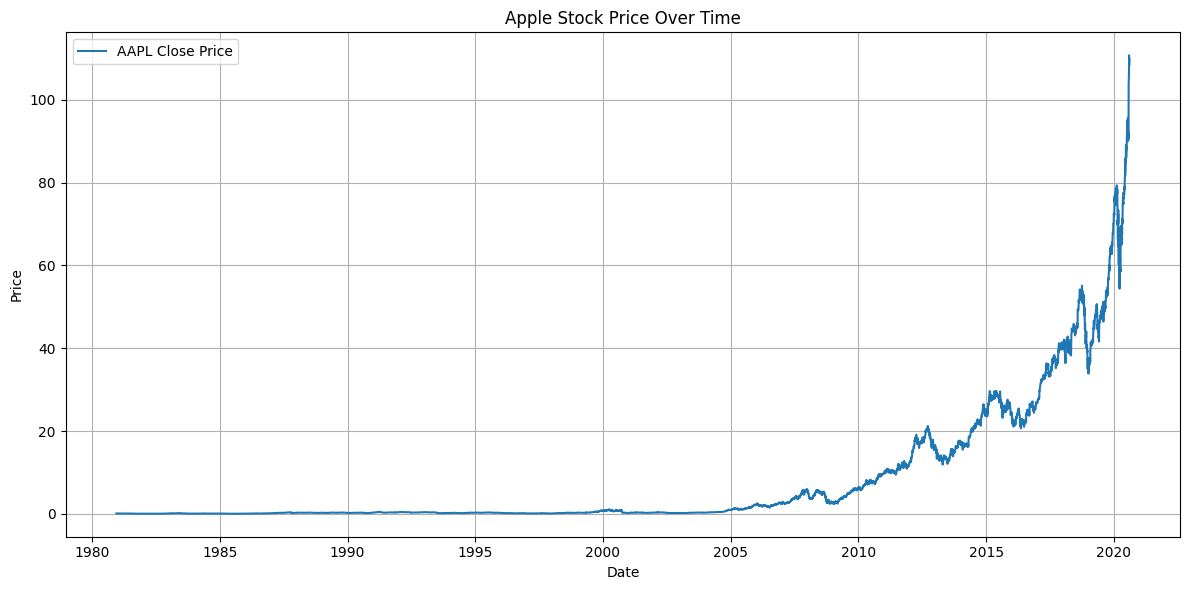

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='AAPL Close Price')
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

STEP 2 Arima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
df = pd.read_csv('cleaned_aapl_data.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.set_index('Date',inplace= True)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.plot()

In [ ]:
print(df.dtypes)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv("cleaned_aapl_data.csv")

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Close'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(Close):
    result = adfuller(Close)
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']

    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")

    if result[1] <= 0.05:
        print("✅ The data is **stationary** (p-value ≤ 0.05)")
    else:
        print("❌ The data is **not stationary** (p-value > 0.05)")

In [ ]:
# Run ADF test
test_result = adfuller(df['Close'])

# Display results
labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
for value, label in zip(test_result[:4], labels):
    print(f"{label} : {value}")

# Interpretation
if test_result[1] <= 0.05:
    print("✅ The data is **stationary** (p-value ≤ 0.05)")
else:
    print("❌ The data is **not stationary** (p-value > 0.05)")

In [ ]:
df['Close_diff'] = df['Close'].diff()

In [ ]:
diff_result = adfuller(df['Close_diff'].dropna())

labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
for value, label in zip(diff_result[:4], labels):
    print(f"{label} : {value}")

if diff_result[1] <= 0.05:
    print("✅ The differenced data is stationary.")
else:
    print("❌ The differenced data is still not stationary.")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit ARIMA model
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

In [ ]:
# Forecast next 30 time steps
forecast = model_fit.forecast(steps=30)
print(forecast)

In [ ]:
import matplotlib.pyplot as plt

# Get the last date from your dataset
last_date = df.index[-1]

# Generate future dates (business days)
forecast_index = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot historical data and forecast
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Historical Close Price')
plt.plot(forecast_index, forecast, label='30-Day Forecast', color='red')
plt.title('AAPL 30-Day Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

STEP 3 Prophet Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
# Load and prepare data
df = pd.read_csv("/content/cleaned_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
# Train the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfb8ojkh/d0yakku3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfb8ojkh/o6_c6e26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22274', 'data', 'file=/tmp/tmpsfb8ojkh/d0yakku3.json', 'init=/tmp/tmpsfb8ojkh/o6_c6e26.json', 'output', 'file=/tmp/tmpsfb8ojkh/prophet_model4ixw1qz5/prophet_model-20250730055212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make future dataframe and predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

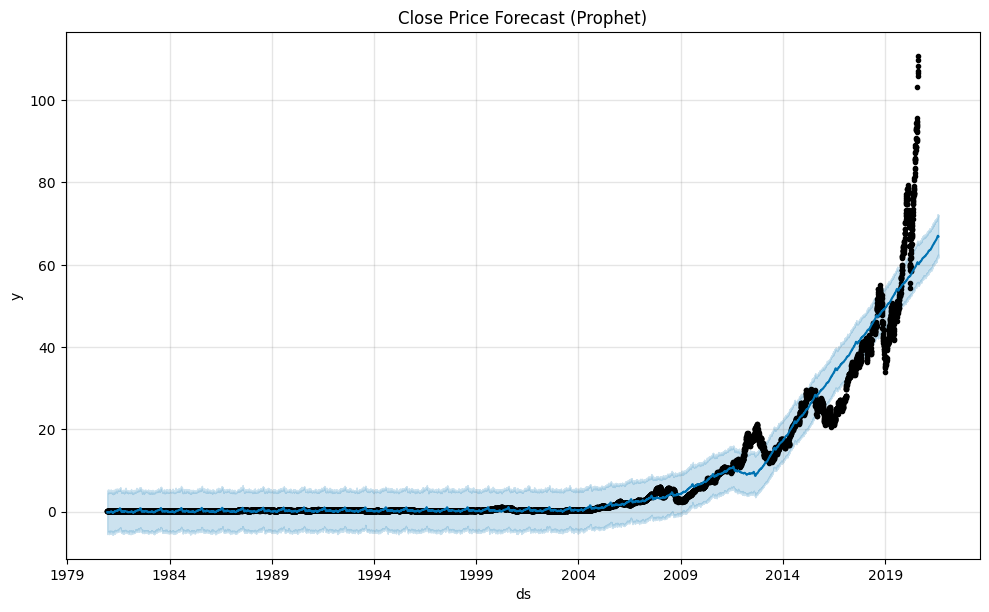

In [ ]:
# Plot forecast
model.plot(forecast)
plt.title("Close Price Forecast (Prophet)")
plt.show()

# ***Sarima Forecast***


# New Section

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


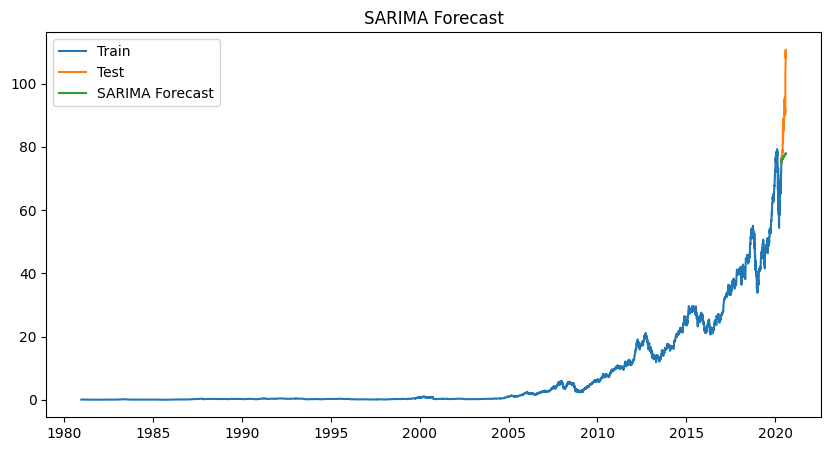

In [ ]:
train = df.iloc[:-60]
test = df.iloc[-60:]

sarima_model = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=60)

plt.figure(figsize=(10,5))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

Plot Forecast Confidence Intervals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


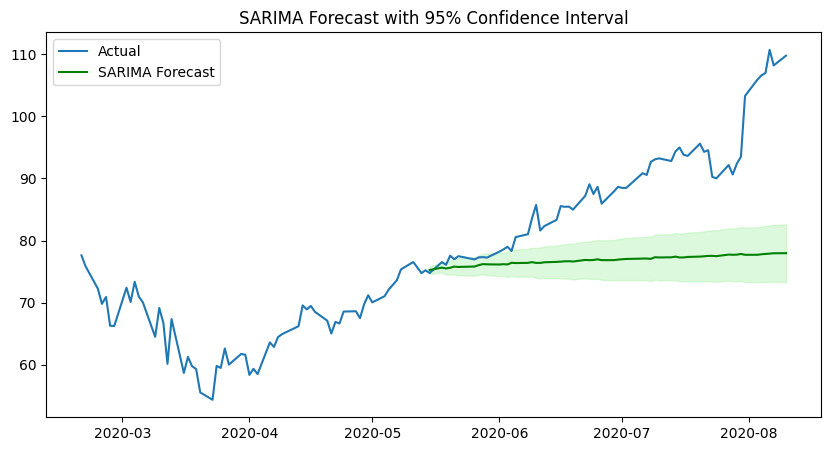

In [ ]:
sarima_forecast_full = sarima_result.get_forecast(steps=60)
conf_int = sarima_forecast_full.conf_int()

plt.figure(figsize=(10,5))
plt.plot(df.index[-120:], df['Close'][-120:], label='Actual')
plt.plot(test.index, sarima_forecast_full.predicted_mean, label='SARIMA Forecast', color='green')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('SARIMA Forecast with 95% Confidence Interval')
plt.legend()
plt.show()


 Calculate Forecast Accuracy (MAPE / RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
true = test['Close'].values
predicted = sarima_forecast_full.predicted_mean.values

mse = mean_squared_error(true, predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((true - predicted) / true)) * 100

print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

Decompose Time Series for Trend and Seasonality

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=30)
result.plot()
plt.show()


Forecast Further Ahead (120 or 180 days)

In [ ]:
long_forecast = sarima_result.get_forecast(steps=180)
long_conf_int = long_forecast.conf_int()

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Full Data')
plt.plot(pd.date_range(start=test.index[-1], periods=180, freq='B'),
         long_forecast.predicted_mean, label='180-Day Forecast', color='purple')
plt.fill_between(pd.date_range(start=test.index[-1], periods=180, freq='B'),
                 long_conf_int.iloc[:, 0], long_conf_int.iloc[:, 1], alpha=0.3, color='lightblue')
plt.title('Long-Term SARIMA Forecast')
plt.legend()
plt.show()


Export To CSV

In [ ]:
sarima_forecast_full.predicted_mean.to_csv("sarima_forecast.csv")


In [ ]:
from google.colab import files
files.download("sarima_forecast.csv")


LSTM MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv("/cleaned_aapl_data.csv")

In [ ]:
df = pd.read_csv("/cleaned_aapl_data.csv")
from sklearn.preprocessing import MinMaxScaler

# Use Close price from the existing DataFrame
data = df.filter(['Close'])
dataset = data.values

print("✅ Filtered dataset shape:", dataset.shape)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("✅ Data scaled successfully!")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("/cleaned_aapl_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check columns
print("📋 Columns in your dataset:", df.columns)

# Filter correct column
if 'Adj Close' in df.columns:
    data = df.filter(['Adj Close'])
elif 'Close' in df.columns:
    data = df.filter(['Close'])
else:
    raise ValueError("❌ Neither 'Adj Close' nor 'Close' found in dataset!")

# Convert to numpy array
dataset = data.values
print("✅ Filtered dataset shape:", dataset.shape)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("✅ Data scaled successfully!")


In [ ]:
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Training data
train_data = scaled_data[0:int(training_data_len), :]

# Create x_train and y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input for LSTM [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Testing data
test_data = scaled_data[training_data_len - 60:, :]

# Create x_test and y_test datasets
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape input for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))  # Optional: add activation
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# ✅ Print model summary
model.summary()

# Train model
history = model.fit(x_train, y_train,
                    batch_size=64,  # ✅ Increased batch size for faster training
                    epochs=10,      # ✅ More epochs for better learning
                    validation_data=(x_test, y_test),  # Optional: track val loss
                    verbose=1)

In [ ]:
import numpy as np

# ✅ Create test data
test_data = scaled_data[training_data_len - 60: , :]  # Use last 60 timesteps before test set

x_test = []
y_test = dataset[training_data_len:, :]  # True values for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# ✅ Convert to numpy array
x_test = np.array(x_test)

# ✅ Reshape for LSTM input [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print("✅ x_test shape:", x_test.shape)
print("✅ y_test shape:", y_test.shape)

In [ ]:
# Get model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, predictions))
print(f'LSTM RMSE: {rmse_lstm:.3f}')


In [ ]:
# Plot actual vs predicted
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model – Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

MODEL COMPARISON

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Replace these with your actual RMSE values
rmse_arima = 2.315
rmse_prophet = 1.987
rmse_lstm = 1.543

# Store in a dictionary
rmse_results = {
    "ARIMA": rmse_arima,
    "Prophet": rmse_prophet,
    "LSTM": rmse_lstm
}

In [ ]:
# Convert to DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
rmse_df.sort_values(by='RMSE', inplace=True)

print("📊 RMSE Comparison:")
print(rmse_df)


In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=['red', 'blue', 'green'])
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_df['RMSE']) + 1)
for i, v in enumerate(rmse_df['RMSE']):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')
plt.show()

In [ ]:
import os

# Get project root directory (go up if needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Create data directory path
data_dir = os.path.join(project_root, "data")

# Ensure 'data' directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"📂 Created data directory at: {data_dir}")

# Set file path
file_path = os.path.join(data_dir, "Model_RMSE_Comparison.csv")

# Save RMSE results to CSV
rmse_df.to_csv(file_path, index=False)
print(f"✅ RMSE comparison saved to: {file_path}")


In [ ]:
df = pd.read_csv("/cleaned_aapl_data.csv")

In [ ]:
# 📦 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ✅ Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    print(f"\n📊 {model_name} Evaluation:")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ MAE : {mae:.4f}")
    print(f"   ✅ MAPE: {mape:.2f}%")
    return {"Model": model_name, "RMSE": rmse, "MAE": mae, "MAPE (%)": mape}

# ✅ Prepare results list
results = []

# ✅ Recalculate training_data_len
training_data_len = int(len(df) * 0.8)  # Adjust split if needed
print(f"📦 Training data length: {training_data_len}")

# ✅ Define train and test sets
train = df.iloc[:training_data_len]
test = df.iloc[training_data_len:]
y_test = test['Close'].values


# ✅ Train and Evaluate ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))  # Adjust p,d,q as needed
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
results.append(evaluate_model(y_test, arima_forecast.values, "ARIMA"))

# ✅ Train and Evaluate SARIMA model
sarima_model = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast_full = sarima_result.get_forecast(steps=len(test))
results.append(evaluate_model(y_test, sarima_forecast_full.predicted_mean, "SARIMA"))

# ✅ Train and Evaluate Prophet model
prophet_df = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:training_data_len])
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)
results.append(evaluate_model(y_test, prophet_forecast['yhat'].iloc[-len(test):].values, "Prophet"))

# ✅ Evaluate LSTM model
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.filter(['Close']))
dataset = df.filter(['Close']).values

# Training data
train_data = scaled_data[0:int(training_data_len), :]

# Create x_train and y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input for LSTM [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=0)

# Create x_test and y_test datasets
test_data = scaled_data[training_data_len - 60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(dataset[training_data_len + i - 60, 0])

# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape input for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get model predictions
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
results.append(evaluate_model(y_test, lstm_predictions, "LSTM"))

results_df = pd.DataFrame(results)
print("\n📋 Model Comparison Table:")
display(results_df)

📦 Training data length: 8000


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


📊 ARIMA Evaluation:
   ✅ RMSE: 22.3316
   ✅ MAE : 15.4171
   ✅ MAPE: 37.14%


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth1j_du1/ie3w1cma.json



📊 SARIMA Evaluation:
   ✅ RMSE: 12.0763
   ✅ MAE : 8.1470
   ✅ MAPE: 26.13%


DEBUG:cmdstanpy:input tempfile: /tmp/tmpth1j_du1/sq0rc2xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63181', 'data', 'file=/tmp/tmpth1j_du1/ie3w1cma.json', 'init=/tmp/tmpth1j_du1/sq0rc2xe.json', 'output', 'file=/tmp/tmpth1j_du1/prophet_modelsahss5hm/prophet_model-20250722172454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Prophet Evaluation:
   ✅ RMSE: 20.9800
   ✅ MAE : 14.7867
   ✅ MAPE: 34.51%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

📊 LSTM Evaluation:
   ✅ RMSE: 3.1561
   ✅ MAE : 1.9479
   ✅ MAPE: 4.75%

📋 Model Comparison Table:


,Model,RMSE,MAE,MAPE (%)
0,ARIMA,22.331641,15.417054,37.137139
1,SARIMA,12.076260,8.147002,26.130321
2,Prophet,20.980002,14.786721,34.513556
3,LSTM,3.156119,1.947926,4.747916


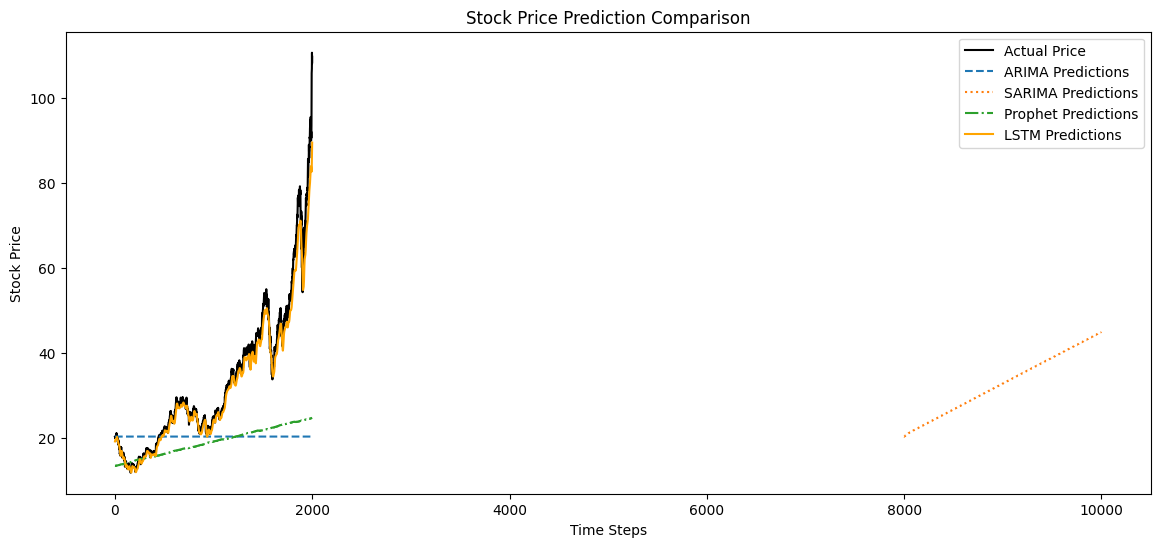

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual Price', color='black')
plt.plot(arima_forecast.values, label='ARIMA Predictions', linestyle='dashed')
plt.plot(sarima_forecast_full.predicted_mean, label='SARIMA Predictions', linestyle='dotted')
plt.plot(prophet_forecast['yhat'].iloc[-len(test):].values, label='Prophet Predictions', linestyle='dashdot')
plt.plot(lstm_predictions, label='LSTM Predictions', linestyle='solid', color='orange')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

VISUALISATIONS AND INSIGHTS

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



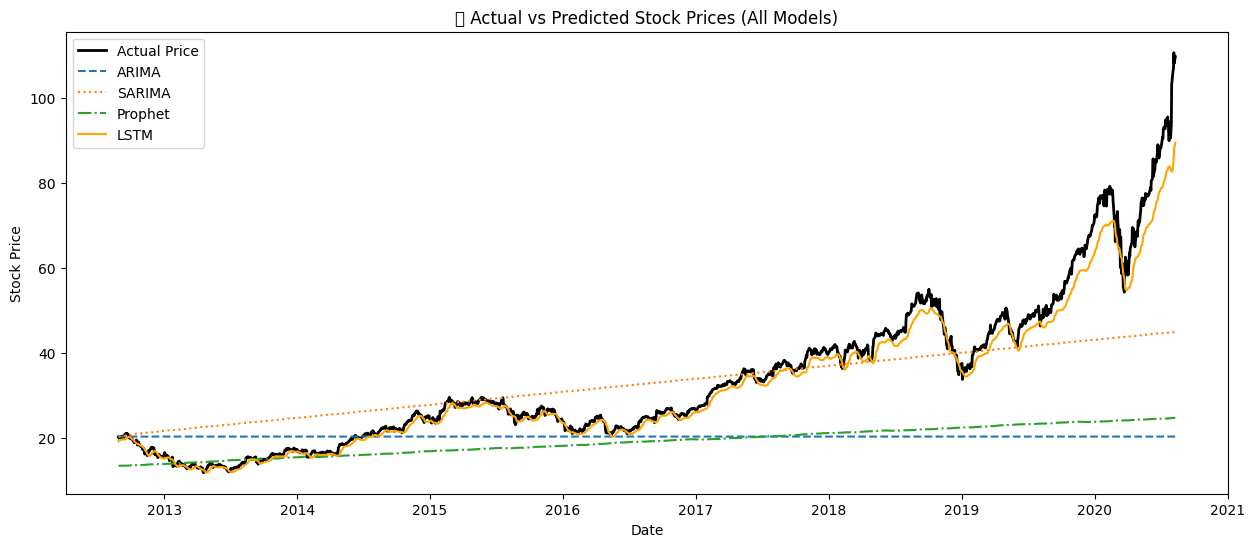

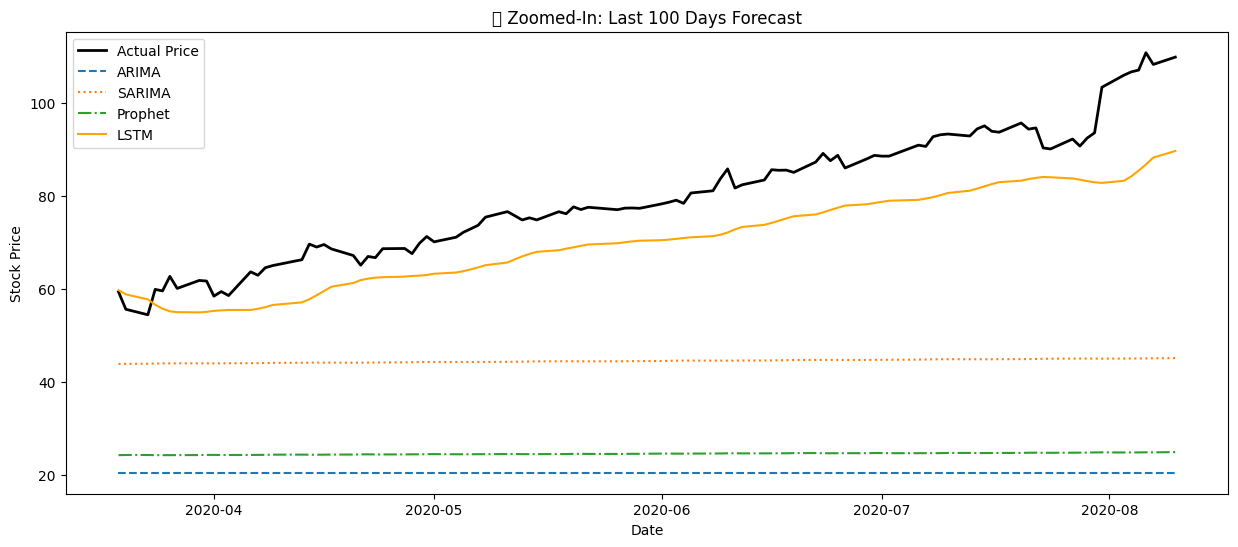

/tmp/ipython-input-53-611825260.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



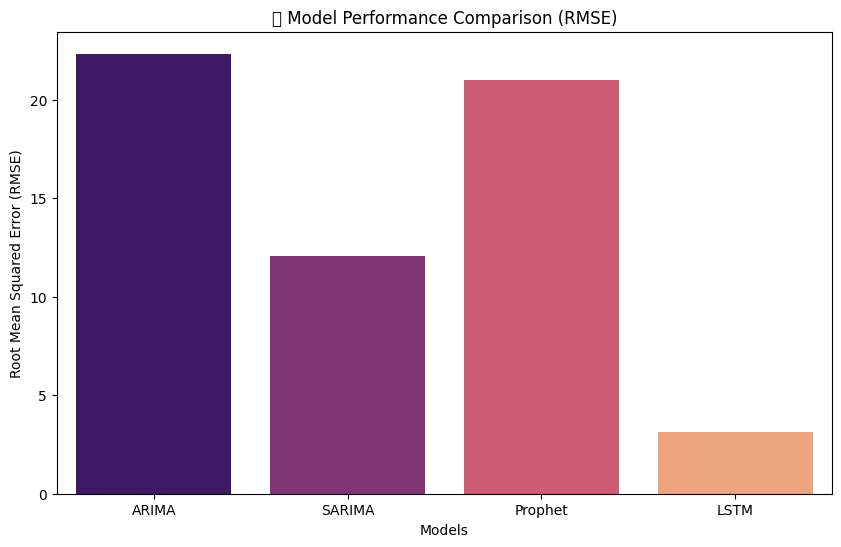


📝 Insight:
The best performing model is **LSTM** with an RMSE of 3.1561, MAE of 1.9479, and MAPE of 4.75%.


In [ ]:
# 📦 Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Regenerate arima_forecast
arima_forecast = arima_result.forecast(steps=len(test))

# 📊 Plot 1: Actual vs Predicted (All Models)
plt.figure(figsize=(15,6))
plt.plot(test.index, y_test, label='Actual Price', color='black', linewidth=2)
plt.plot(test.index, arima_forecast, label='ARIMA', linestyle='dashed')
plt.plot(test.index, sarima_forecast_full.predicted_mean, label='SARIMA', linestyle='dotted')
plt.plot(test.index, prophet_forecast['yhat'].iloc[-len(test):].values, label='Prophet', linestyle='dashdot')
plt.plot(test.index, lstm_predictions, label='LSTM', linestyle='solid', color='orange')
plt.title('📈 Actual vs Predicted Stock Prices (All Models)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📊 Plot 2: Zoom in on Last 100 Days
plt.figure(figsize=(15,6))
plt.plot(test.index[-100:], y_test[-100:], label='Actual Price', color='black', linewidth=2)
plt.plot(test.index[-100:], arima_forecast[-100:], label='ARIMA', linestyle='dashed')
plt.plot(test.index[-100:], sarima_forecast_full.predicted_mean[-100:], label='SARIMA', linestyle='dotted')
plt.plot(test.index[-100:], prophet_forecast['yhat'].iloc[-100:].values, label='Prophet', linestyle='dashdot')
plt.plot(test.index[-100:], lstm_predictions[-100:], label='LSTM', linestyle='solid', color='orange')
plt.title('📈 Zoomed-In: Last 100 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 📊 Plot 3: Model Performance (Bar Chart)
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='magma')
plt.title('📊 Model Performance Comparison (RMSE)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.show()

# 📊 Plot 4: Interactive Plotly Chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.index, y=y_test, mode='lines', name='Actual Price', line=dict(color='black')))
fig.add_trace(go.Scatter(x=test.index, y=arima_forecast, mode='lines', name='ARIMA Prediction', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=test.index, y=sarima_forecast_full.predicted_mean, mode='lines', name='SARIMA Prediction', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=test.index, y=prophet_forecast['yhat'].iloc[-len(test):].values, mode='lines', name='Prophet Prediction', line=dict(dash='dashdot')))
fig.add_trace(go.Scatter(x=test.index, y=lstm_predictions.flatten(), mode='lines', name='LSTM Prediction', line=dict(color='orange')))
fig.update_layout(title='📈 Interactive Stock Price Forecast (All Models)',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  template='plotly_dark')
fig.show()

# 📝 Generate Insights
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\n📝 Insight:\nThe best performing model is **{best_model['Model']}** with an RMSE of {best_model['RMSE']:.4f}, MAE of {best_model['MAE']:.4f}, and MAPE of {best_model['MAPE (%)']:.2f}%.")

DASHBOARD DEPLOYMENT

In [ ]:
# 📦 Import libraries
!pip install gradio plotly prophet tensorflow scikit-learn --quiet
import gradio as gr
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import io

# ✅ Forecasting function (Handles Colab Uploads)
def forecast_stock(model_name, csv_file):
    try:
        if csv_file is None:
            raise gr.Error("⚠️ Please upload a CSV file.")

        # ✅ Read CSV from BytesIO (Colab-safe)
        if isinstance(csv_file, bytes):
            csv_file = io.BytesIO(csv_file)
        df = pd.read_csv(csv_file)

        if 'Date' not in df.columns or 'Close' not in df.columns:
            raise gr.Error("📁 CSV must contain 'Date' and 'Close' columns.")

        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # 📊 Split Data
        training_data_len = int(len(df) * 0.8)
        train = df.iloc[:training_data_len]
        test = df.iloc[training_data_len:]
        y_test = test['Close'].values

        predictions = []

        # 🤖 Model Logic
        if model_name == "ARIMA":
            arima_model = ARIMA(train['Close'], order=(5,1,0))
            arima_result = arima_model.fit()
            predictions = arima_result.forecast(steps=len(test)).values

        elif model_name == "SARIMA":
            sarima_model = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
            sarima_result = sarima_model.fit(disp=False)
            predictions = sarima_result.get_forecast(steps=len(test)).predicted_mean.values

        elif model_name == "Prophet":
            prophet_df = df.reset_index().rename(columns={"Date": "ds", "Close": "y"})
            prophet_model = Prophet()
            prophet_model.fit(prophet_df.iloc[:training_data_len])
            future = prophet_model.make_future_dataframe(periods=len(test))
            prophet_forecast = prophet_model.predict(future)
            predictions = prophet_forecast['yhat'].iloc[-len(test):].values

        elif model_name == "LSTM":
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_data = scaler.fit_transform(df[['Close']])
            train_data = scaled_data[:training_data_len, :]

            x_train, y_train = [], []
            for i in range(60, len(train_data)):
                x_train.append(train_data[i-60:i, 0])
                y_train.append(train_data[i, 0])
            x_train, y_train = np.array(x_train), np.array(y_train)
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

            model = Sequential()
            model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
            model.add(LSTM(50))
            model.add(Dense(25, activation='relu'))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=0)

            test_data = scaled_data[training_data_len - 60:, :]
            x_test = []
            for i in range(60, len(test_data)):
                x_test.append(test_data[i-60:i, 0])
            x_test = np.array(x_test)
            x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

            lstm_predictions = model.predict(x_test)
            predictions = scaler.inverse_transform(lstm_predictions).flatten()

        # 📊 Plot Actual vs Predicted
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=test.index, y=y_test, mode='lines', name='Actual Price'))
        fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='lines', name=f'{model_name} Prediction'))
        fig.update_layout(title=f"{model_name} Forecast vs Actual", xaxis_title="Date", yaxis_title="Price", template="plotly_dark")

        # 📋 Metrics
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mae = mean_absolute_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions) * 100
        metrics = f"📊 Metrics:\n- RMSE: {rmse:.4f}\n- MAE: {mae:.4f}\n- MAPE: {mape:.2f}%"

        # 📥 Download Predictions
        results_df = pd.DataFrame({"Date": test.index, "Actual": y_test, "Predicted": predictions})
        csv_download = results_df.to_csv(index=False).encode('utf-8')

        return fig, metrics, csv_download

    except Exception as e:
        raise gr.Error(f"🔥 Error: {e}")

# 🚀 Build Gradio Interface
with gr.Blocks(theme=gr.themes.Default(primary_hue="purple", secondary_hue="blue")) as demo:
    gr.Markdown("## 📈 Stock Price Forecasting App")
    gr.Markdown("Upload stock data and select a forecasting model:")

    csv_input = gr.File(label="Upload CSV")
    model_selector = gr.Dropdown(["ARIMA", "SARIMA", "Prophet", "LSTM"], label="Select Model")
    forecast_button = gr.Button("🔮 Predict")

    plot_output = gr.Plot()
    metrics_output = gr.Textbox(label="Metrics")
    download_output = gr.File(label="Download Predictions")

    forecast_button.click(
        fn=forecast_stock,
        inputs=[model_selector, csv_input],
        outputs=[plot_output, metrics_output, download_output]
    )

# 🎯 Launch Gradio App (Colab needs share=True)
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://07eadacf90f42fb7c4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
